In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = "C:/Users/g/OneDrive/Desktop/AIML/project1/House_Rent_Dataset.csv"
#df = pd.read_csv(io.StringIO(dataset) , sep=r'\s+')  # Replace with actual dataset path
df = pd.read_csv(dataset)
df

# Exploratory Data Analysis
#print(df.describe())

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [4]:
df.columns
X = df[['Size']]# Features
y = df['Rent']

In [5]:
# Split data
X_train, X_temp_test, y_train, y_temp_test = train_test_split(X, y, test_size=0.4) #random_state=42)

#further split test data into cross validation and test
X_cv, X_test, y_cv, y_test = train_test_split(X_temp_test, y_temp_test, test_size=0.5)

In [6]:
########## SCi KIT learning 
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Predictions
y_pred = model.predict(X_cv)

In [8]:
# Evaluate model
mae = mean_absolute_error(y_cv, y_pred)
mse = mean_squared_error(y_cv, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 29664.812626415438
MSE: 3672444257.9577518
RMSE: 60600.69519368364


In [9]:
y_predr2 = model.predict(X_test)
r2 = r2_score(y_test, y_predr2)
print(f'R² Score: {r2}')

R² Score: 0.23397415357066798


<Axes: xlabel='Size', ylabel='Rent'>

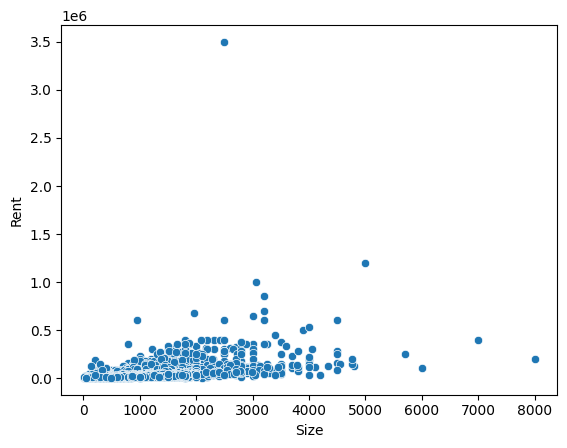

In [11]:
sns.scatterplot(data=df, x="Size", y="Rent")

In [12]:
def adjust_size(row):
    if row['Area Type'] == 'Super Area':
        return row['Size'] * 0.75
    elif row['Area Type'] == 'Carpet Area':
        return row['Size'] * 1.3
    else:
        return row['Size']
        
df['final_size'] = df.apply(adjust_size, axis=1)

In [13]:
X = df[['final_size']]# Features
y = df['Rent']
# Split data
X_train, X_temp_test, y_train, y_temp_test = train_test_split(X, y, test_size=0.4) #random_state=42)

#further split test data into cross validation and test
X_cv, X_test, y_cv, y_test = train_test_split(X_temp_test, y_temp_test, test_size=0.5)

In [15]:
# Predictions
y_pred = model.predict(X_cv)

In [16]:
# Evaluate model
mae = mean_absolute_error(y_cv, y_pred)
mse = mean_squared_error(y_cv, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 26303.783915694657
MSE: 1889265332.4736974
RMSE: 43465.679938011985


In [17]:
y_predr2 = model.predict(X_test)
r2 = r2_score(y_test, y_predr2)
print(f'R² Score: {r2}')

R² Score: 0.40211527111775036


<Axes: xlabel='final_size', ylabel='Rent'>

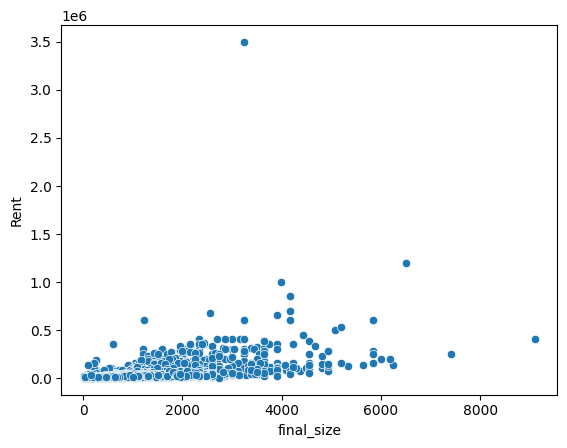

In [18]:
sns.scatterplot(data=df, x="final_size", y="Rent")